<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-5-Hough-Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ERYkBsk0uqDm4QdwOO8-OMnfuLXYevGX' -O coins.png

In [3]:


# 이미지를 읽어옴 (이미지 경로를 자신의 이미지 파일로 변경)
image = cv2.imread('coins.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:


# 가우시안 블러 적용 (노이즈 제거)
gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# 허프 원 변환을 사용하여 원 탐지
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=50,
    param2=30,
    minRadius=15,
    maxRadius=50
)

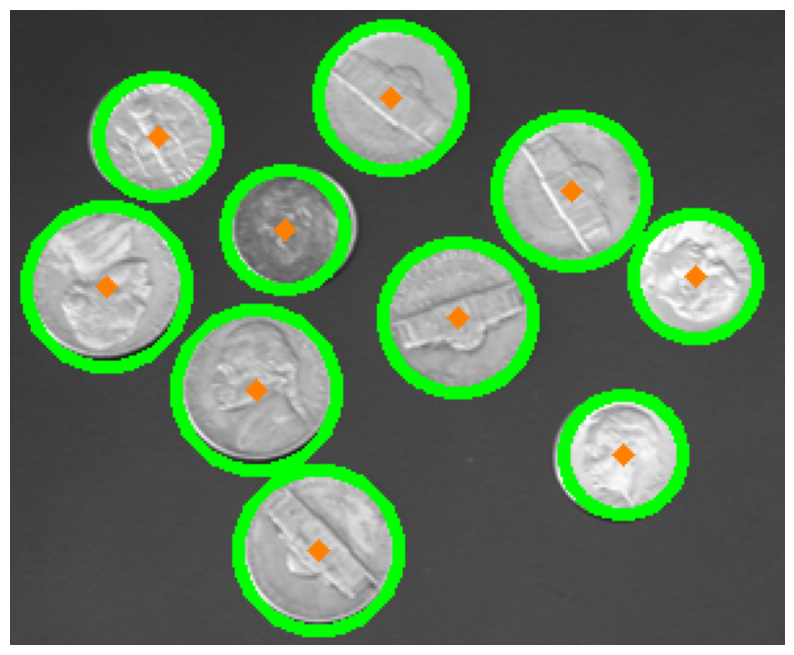

In [5]:


# 원이 발견된 경우 원을 이미지에 그리기
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in circles:
        # 원의 외곽 그리기
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        # 원의 중심 그리기
        cv2.circle(image, (x, y), 2, (0, 128, 255), 3)

# 결과를 보여주기
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
